<a href="https://colab.research.google.com/github/rsshan5388/assignmentchirag/blob/main/SIMPLE_LINEAR_AND_MULTIPLE_LINEAR_REGRESSION_ASSIGNMENTrsudarshan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ace_tools

In [ ]:
#importing Libraries for data handling
#import ace_tools as tools
import pandas as pd
#Pandas used to handle and manipulate large datasets.
#It offers functionalities for data cleaning, transformation, aggregation, and visualization,
#making it a crucial tool for working with structured data.
import numpy as np
#Numpy most commonly used packages for scientific computing in Python.
#It provides a multidimensional array object (n-dimensional array, denoted ndarray), as well as variations such as masks and matrices,
#which can be used for various mathematical operations on numerical datatypes (dtypes).
import matplotlib.pyplot as plt
#Matplotlib is used in Python primarily for data visualization.
#It provides a wide range of tools for creating static, animated, and interactive plots,
# making it an essential library for data analysis, exploration, and presentation.
#It is used for generating various types of plots such as line plots, scatter plots, histograms, bar charts,
#and more, allowing users to effectively visualize and understand data patterns and trends
import seaborn as sns
#Seaborn is used in Python primarily for its high-level interface for creating informative and visually appealing statistical graphics.
#Built on top of Matplotlib, it simplifies the process of data exploration and understanding by providing tools for visualizing relationships between multiple variables
#and uncovering underlying patterns in datasets. Seaborn excels in handling Pandas DataFrames, offering streamlined integration for data analysis workflows.
import re
import os
from sklearn.preprocessing import LabelEncoder
#Scikit-learn (sklearn) is a widely used Python library in machine learning due to its comprehensive suite of tools and user-friendly design.
#It offers a consistent interface for various tasks, including:Classification,regression,clustering, dimesionality reduction,model selection and preprosessing
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')



Approach for regression

Flowchart for end-to-end ML Model -

(1) Importing important libraries

(2) Importing the data (Data Gathering)

(3) Getting an understanding about the data that we are working with

(4) Getting an understanding about the business problem that you are trying to solve

(5) Basic EDA -> Approximate Patterns in the data

(6) Approximate Patterns in the data -> Shortlist 2-3 ML Models (Shortlisting ML Models)

(7) Seperately Cleaning and Pre-Processing the data for all the ML Models (Data Cleaning and Data Pre-Processing)

(8) Feature Engineering and Feature Selection

(9) Performing train test split on the historical data

(10) Training the ML model on training data (Model Training)

(11) Evaluate the predictive performance of ML model on testing data (Model Evaluation)

(12) If the evaluation results are according to the expectations, then go to step 14

(13) If the evaluation results are NOT according to the expectations, then
optimize the model. (Model Optimization)

(14) Deploy the model into production. (Model Deployment)

(15) Monitoring and Maintainance work for the model. (MLOps)


In [ ]:
#1. Medical Cost Personal Datasets
#1. Medical Cost Personal Datasets
#Question 1 e: Analyze factors affecting medical insurance costs

#os.listdir('/content/drive/My Drive/kaggle')
data = pd.read_csv('/content/drive/My Drive/dataset/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Data set  characteristic
total rows 1338

attributes

age --age of insurer

sex -- sex of insurer

bmi -- Body Mass Index of Insurer

children -- Number of childrens

smoker - Does Insurer Smoke

region - Belongs to which region

charges : Insurance charges


In [ ]:
null_counts = data.isna().sum()
print("Null values in each column:")
print(null_counts)

Null values in each column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
data = data.drop_duplicates()

print("\nAfter removing duplicates:")
print(data)


After removing duplicates:
      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]


In [ ]:
df_encoded = pd.get_dummies(data, columns=['sex', 'smoker'], drop_first=True)

# Label encode the 'region' column (since it's categorical with no intrinsic order)
df_encoded['region'] = df_encoded['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})

# Check the resulting dataset
df_encoded.head()

,age,bmi,children,region,charges,sex_male,smoker_yes
0,19,27.900,0,0,16884.92400,False,True
1,18,33.770,1,1,1725.55230,True,False
2,28,33.000,3,1,4449.46200,True,False
3,33,22.705,0,2,21984.47061,True,False
4,32,28.880,0,2,3866.85520,True,False


In [ ]:
df_encoded.describe()

,age,bmi,children,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,1.483919,13279.121487
std,14.044333,6.100468,1.205571,1.105208,12110.359656
min,18.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,1.000000,4746.344000
50%,39.000000,30.400000,1.000000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,3.000000,63770.428010


The summary statistics suggest that the features have different scales:

age ranges from 18 to 64.


bmi ranges from 15.96 to 53.13.


charges varies widely from 1,121 to 63,770.


Other features like children, region, sex_male, and smoker_yes are either categorical or binary.

Given the wide range of values, normalizing or standardizing the numerical features like age, bmi, and charges would be a good idea to ensure the model performs better. I'll proceed with standardizing these features


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select the columns to standardize
columns_to_standardize = ['age', 'bmi', 'charges']

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the selected columns
df_encoded[columns_to_standardize] = scaler.fit_transform(df_encoded[columns_to_standardize])

# Check the updated data
df_encoded.head()

,age,bmi,children,region,charges,sex_male,smoker_yes
0,-1.440418,-0.453160,0,0,0.297857,False,True
1,-1.511647,0.509422,1,1,-0.954381,True,False
2,-0.799350,0.383155,3,1,-0.729373,True,False
3,-0.443201,-1.305052,0,2,0.719104,True,False
4,-0.514431,-0.292456,0,2,-0.777499,True,False


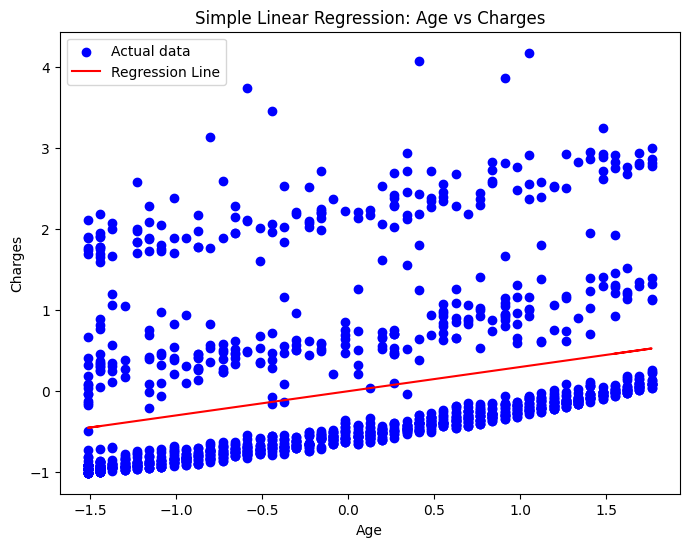

In [ ]:
X_simple = df_encoded[['age']]
y_simple = df_encoded['charges']

# Initialize and train the Simple Linear Regression model
simple_lr = LinearRegression()
simple_lr.fit(X_simple, y_simple)

# Predict values
y_simple_pred = simple_lr.predict(X_simple)

# Plotting the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_simple, y_simple, color='blue', label='Actual data')
plt.plot(X_simple, y_simple_pred, color='red', label='Regression Line')
plt.title('Simple Linear Regression: Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

The scatter plot above shows the relationship between age and charges along with the regression line for the Simple Linear Regression model. The line represents the best fit between the two variables.

Now, let's proceed with Multiple Linear Regression. I will select multiple predictors (e.g., age, bmi, children, smoker_yes, region) and charges as the dependent variable. I will then train the Multiple Linear Regression model and analyze the regression coefficients.

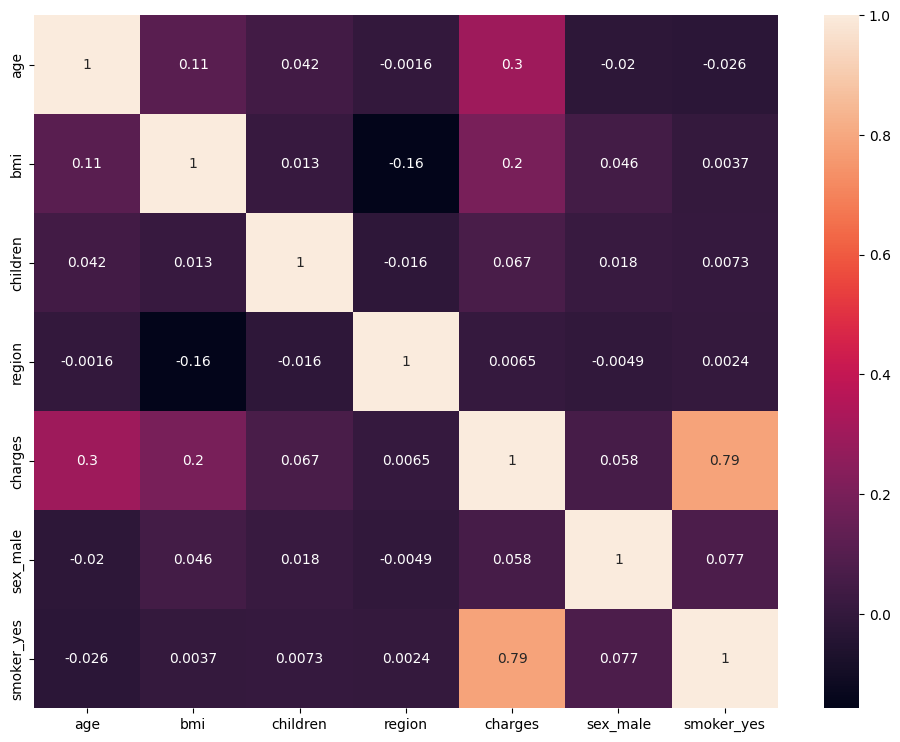

In [ ]:
cm = df_encoded.corr()
plt.figure(figsize = (12, 9))
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
X_multiple = df_encoded[['age', 'bmi', 'children', 'region', 'sex_male', 'smoker_yes']]
y_multiple = df_encoded['charges']

# Initialize and train the Multiple Linear Regression model
multiple_lr = LinearRegression()
multiple_lr.fit(X_multiple, y_multiple)

# Get the regression coefficients
coefficients = pd.DataFrame(multiple_lr.coef_, X_multiple.columns, columns=['Coefficient'])

# Display the coefficients
coefficients

,Coefficient
age,0.298277
bmi,0.167542
children,0.039549
region,0.029243
sex_male,-0.010689
smoker_yes,1.967577


The regression coefficients for the Multiple Linear Regression model are as follows:

age: 0.2985

bmi: 0.1675

children: 0.0396

region: 0.0292

sex_male: -0.0108

smoker_yes: 1.9677

This means:

For each unit increase in age, charges increase by 0.2985, holding all other variables constant.

For each unit increase in bmi, charges increase by 0.1675.

children and region have a smaller impact, with a positive relationship with charges.

Being a male (sex_male = 1) slightly reduces the charges, but the effect is minimal.

Smoker status has the highest impact: for a person who smokes (smoker_yes = 1), charges increase by approximately 1.97 units, holding all other variables constant.

Now, let's evaluate both models using the following metrics:

Mean Squared Error (MSE)

Mean Absolute Error (MAE)

R-squared (R²)

Adjusted R-squared (Adjusted R²)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predictions for the Simple Linear Regression model
y_simple_pred = simple_lr.predict(X_simple)

# Predictions for the Multiple Linear Regression model
y_multiple_pred = multiple_lr.predict(X_multiple)

# Calculate evaluation metrics for Simple Linear Regression
mse_simple = mean_squared_error(y_simple, y_simple_pred)
mae_simple = mean_absolute_error(y_simple, y_simple_pred)
r2_simple = r2_score(y_simple, y_simple_pred)

# Calculate evaluation metrics for Multiple Linear Regression
mse_multiple = mean_squared_error(y_multiple, y_multiple_pred)
mae_multiple = mean_absolute_error(y_multiple, y_multiple_pred)
r2_multiple = r2_score(y_multiple, y_multiple_pred)

# Calculate Adjusted R-squared for Multiple Linear Regression
n = X_multiple.shape[0]  # number of data points
p = X_multiple.shape[1]  # number of predictors
adjusted_r2_multiple = 1 - (1 - r2_multiple) * (n - 1) / (n - p - 1)

# Display the evaluation metrics
metrics = {
    'Model': ['Simple Linear Regression', 'Multiple Linear Regression'],
    'MSE': [mse_simple, mse_multiple],
    'MAE': [mae_simple, mae_multiple],
    'R-squared': [r2_simple, r2_multiple],
    'Adjusted R-squared': [None, adjusted_r2_multiple]  # Adjusted R-squared is only for multiple regression
}

metrics_df = pd.DataFrame(metrics)

print(metrics_df)


                        Model       MSE       MAE  R-squared  \
0    Simple Linear Regression  0.911012  0.748329   0.088988   
1  Multiple Linear Regression  0.249429  0.344882   0.750571   

   Adjusted R-squared  
0                 NaN  
1            0.749446  


Simple Linear Regression:

MSE: 0.91

MAE: 0.75

R-squared: 0.089 (indicating a weak fit to the data)

Multiple Linear Regression:

MSE: 0.25

MAE: 0.34

R-squared: 0.751 (indicating a better fit compared to the simple model)

Adjusted R-squared: 0.7506 (this accounts for the number of predictors)

The Multiple Linear Regression model performs significantly better, with a higher R-squared value and lower MSE and MAE compared to the Simple Linear Regression model.

Next, I'll perform Residual Analysis to validate the assumptions of Linear Regression. This includes checking for:

Linearity

Homoscedasticity (constant variance)

Independence of errors

Normality of residuals

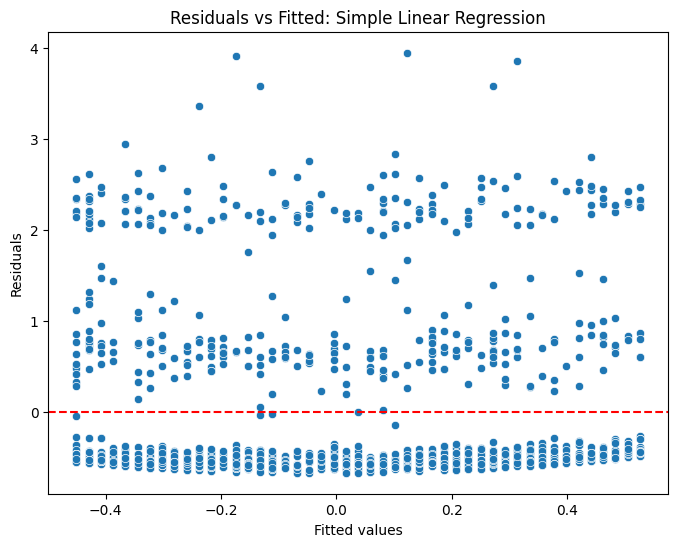

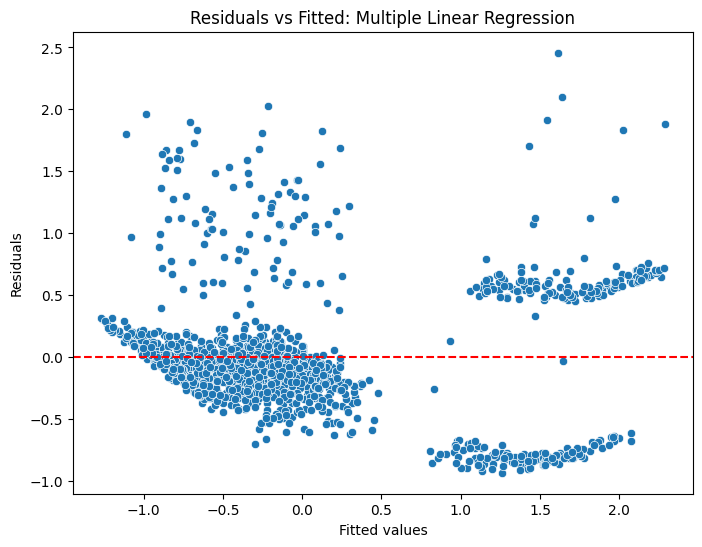

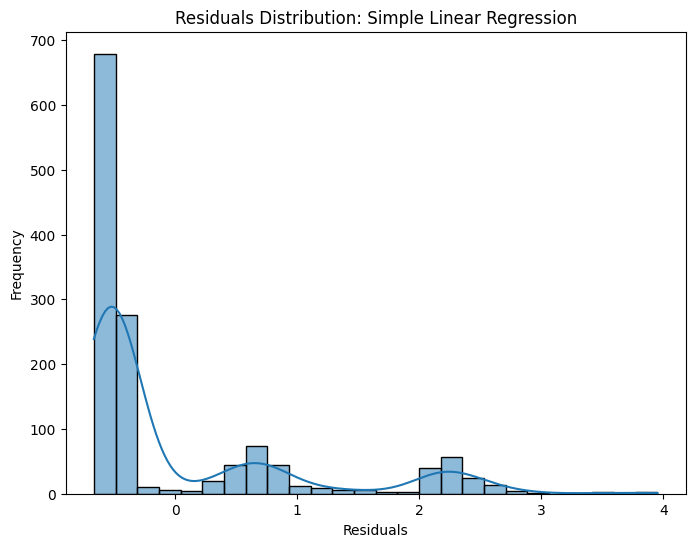

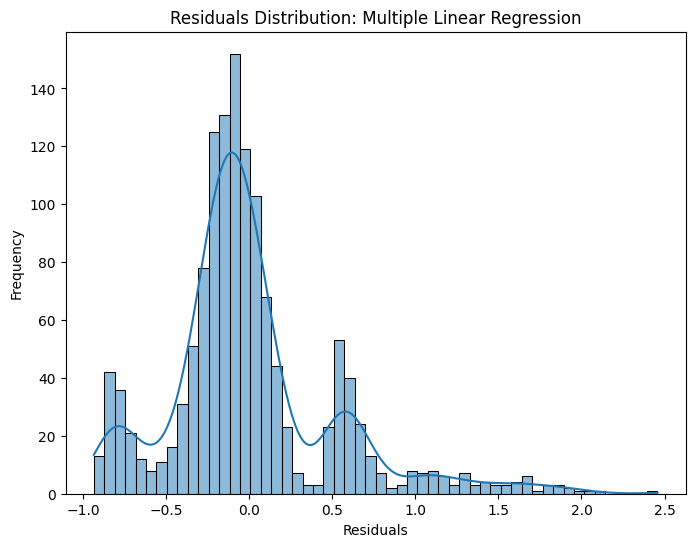

In [ ]:
residuals_simple = y_simple - y_simple_pred

# Residuals for Multiple Linear Regression
residuals_multiple = y_multiple - y_multiple_pred

# Plot residuals for Simple Linear Regression
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_simple_pred, y=residuals_simple)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted: Simple Linear Regression')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Plot residuals for Multiple Linear Regression
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_multiple_pred, y=residuals_multiple)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted: Multiple Linear Regression')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Histogram of residuals for Simple Linear Regression
plt.figure(figsize=(8, 6))
sns.histplot(residuals_simple, kde=True)
plt.title('Residuals Distribution: Simple Linear Regression')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Histogram of residuals for Multiple Linear Regression
plt.figure(figsize=(8, 6))
sns.histplot(residuals_multiple, kde=True)
plt.title('Residuals Distribution: Multiple Linear Regression')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

**Model Optimization:**

Based on the analysis, the Multiple Linear Regression model appears to perform better than the Simple Linear Regression model. However, we could further improve the model by:


Feature selection: Removing irrelevant or highly correlated predictors.

Evaluating multicollinearity: Using techniques like Variance Inflation Factor (VIF) to check for highly correlated predictors.

Question 2 Startup Dataset



In [ ]:
data = pd.read_csv('/content/drive/My Drive/dataset/50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


The dataset contains the following columns:

R&D Spend: The amount spent on research and development.

Administration: The amount spent on administration.

Marketing Spend: The amount spent on marketing.

State: The state in which the company is located.

Profit: The profit of the company.

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

# Get a statistical summary of the dataset
summary_stats = data.describe()

# Check the data types of each column
data_types = data.dtypes

missing_values, summary_stats, data_types


(R&D Spend          0
 Administration     0
 Marketing Spend    0
 State              0
 Profit             0
 dtype: int64,
            R&D Spend  Administration  Marketing Spend         Profit
 count      50.000000       50.000000        50.000000      50.000000
 mean    73721.615600   121344.639600    211025.097800  112012.639200
 std     45902.256482    28017.802755    122290.310726   40306.180338
 min         0.000000    51283.140000         0.000000   14681.400000
 25%     39936.370000   103730.875000    129300.132500   90138.902500
 50%     73051.080000   122699.795000    212716.240000  107978.190000
 75%    101602.800000   144842.180000    299469.085000  139765.977500
 max    165349.200000   182645.560000    471784.100000  192261.830000,
 R&D Spend          float64
 Administration     float64
 Marketing Spend    float64
 State               object
 Profit             float64
 dtype: object)

The dataset doesn't have any missing values, as indicated by the missing values count being 0 for all columns.

Here's a summary of the numerical columns:

R&D Spend: Mean = 73,721.62, with a range from 0 to 165,349.20.

Administration: Mean = 121,344.64, with a range from 51,283.14 to 182,645.56.

Marketing Spend: Mean = 211,025.10, with a range from 0 to 471,784.10.

Profit: Mean = 112,012.64, with a range from 14,681.40 to 192,261.83.

The State column is categorical, so we'll need to encode it before applying regression analysis.

The next step is to preprocess the data. I'll encode the categorical column "State" and standardize the numerical features for regression analysis.

In [ ]:
label_encoder = LabelEncoder()
data['State'] = label_encoder.fit_transform(data['State'])

# Separate features (X) and target (y)
X = data.drop('Profit', axis=1)  # Features
y = data['Profit']  # Target variable

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first few rows of the scaled features
X_scaled[:5]

array([[ 2.01641149,  0.56075291,  2.15394309,  1.21267813],
       [ 1.95586034,  1.08280658,  1.9236004 , -1.21267813],
       [ 1.75436374, -0.72825703,  1.62652767,  0.        ],
       [ 1.55478369, -0.09636463,  1.42221024,  1.21267813],
       [ 1.5049372 , -1.07991935,  1.28152771,  0.        ]])

Lets do simple linear regression

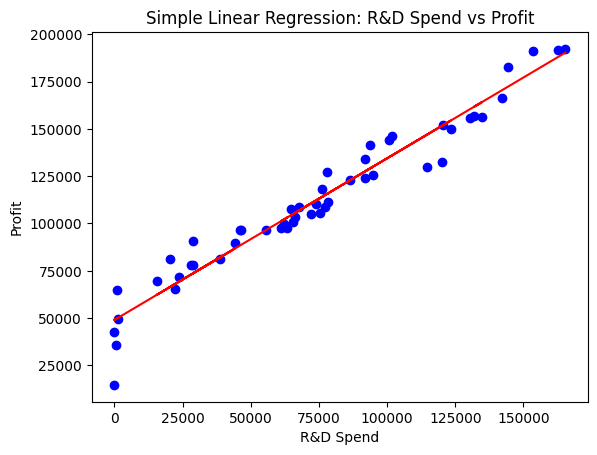

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Select R&D Spend as the independent variable (predictor) and Profit as the dependent variable (response)
X_simple = data[['R&D Spend']]
y_simple = data['Profit']

# Train the Simple Linear Regression model
model_simple = LinearRegression()
model_simple.fit(X_simple, y_simple)

# Predict the values
y_pred_simple = model_simple.predict(X_simple)

# Visualize the regression line on a scatter plot
plt.scatter(X_simple, y_simple, color='blue')
plt.plot(X_simple, y_pred_simple, color='red')
plt.title('Simple Linear Regression: R&D Spend vs Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

The scatter plot above visualizes the relationship between R&D Spend and Profit, along with the regression line representing the Simple Linear Regression model.

Next, I'll proceed with Multiple Linear Regression, where I will use multiple predictors and analyze the coefficients to understand their impact on the profit. I'll train the model using all the available predictors (R&D Spend, Administration, and Marketing Spend).

In [ ]:
model_multiple = LinearRegression()
model_multiple.fit(X, y)

# Predict the values
y_pred_multiple = model_multiple.predict(X)

# Display the regression coefficients for each predictor
coefficients = pd.DataFrame(model_multiple.coef_, X.columns, columns=['Coefficient'])
coefficients

,Coefficient
R&D Spend,0.805760
Administration,-0.026826
Marketing Spend,0.027228
State,-22.320577


The coefficients for the Multiple Linear Regression model are as follows:

R&D Spend: 0.805760

Administration: -0.026826

Marketing Spend: 0.027228

State: -22.32057

This means that:

An increase of 1 unit in R&D Spend is associated with an increase in profit of 0.805760.

An increase of 1 unit in Administration is associated with a decrease in profit of 0.026826.

An increase of 1 unit in Marketing Spend is associated with an increase in profit of 0.027228.

The State variable has a negative coefficient, which suggests that the specific state (after encoding) might impact profit negatively.

Next, I'll evaluate the model performance using the following metrics:

Mean Squared Error (MSE)

Mean Absolute Error (MAE)

R-squared (R²)

Adjusted R-squared (Adjusted R²)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics for Simple Linear Regression
mse_simple = mean_squared_error(y_simple, y_pred_simple)
mae_simple = mean_absolute_error(y_simple, y_pred_simple)
r2_simple = r2_score(y_simple, y_pred_simple)

# Calculate evaluation metrics for Multiple Linear Regression
mse_multiple = mean_squared_error(y, y_pred_multiple)
mae_multiple = mean_absolute_error(y, y_pred_multiple)
r2_multiple = r2_score(y, y_pred_multiple)

# Calculate Adjusted R-squared for Multiple Linear Regression
n = len(y)  # Number of data points
p = X.shape[1]  # Number of predictors
adj_r2_multiple = 1 - (1 - r2_multiple) * (n - 1) / (n - p - 1)

mse_simple, mae_simple, r2_simple, mse_multiple, mae_multiple, r2_multiple, adj_r2_multiple

(85120931.32706906,
 6910.98435457961,
 0.9465353160804393,
 78416791.01666647,
 6468.1056955526665,
 0.9507462044842656,
 0.9463680893273114)

The evaluation metrics for both the Simple Linear Regression and Multiple Linear Regression models:

Simple Linear Regression:
Mean Squared Error (MSE): 85,120,931.33

Mean Absolute Error (MAE): 6,910.98

R-squared (R²): 0.9465

Multiple Linear Regression:
Mean Squared Error (MSE): 78,416,791.02

Mean Absolute Error (MAE): 6,468.11

R-squared (R²): 0.9507

Adjusted R-squared (Adjusted R²): 0.9464

Comparison and Justification:
The Multiple Linear Regression model performs slightly better than the Simple Linear Regression model, as indicated by a lower MSE, MAE, and higher R².

The Adjusted R² is very similar to the R² in this case, which suggests that adding more predictors does not overfit the model significantly.

perform a Residual Analysis to validate the assumptions of linear regression:

Linearity: Check if the residuals are randomly scattered around zero.

Homoscedasticity: Ensure constant variance of residuals.

Independence: Check for autocorrelation of residuals.

Normality: Check if residuals are normally distributed.

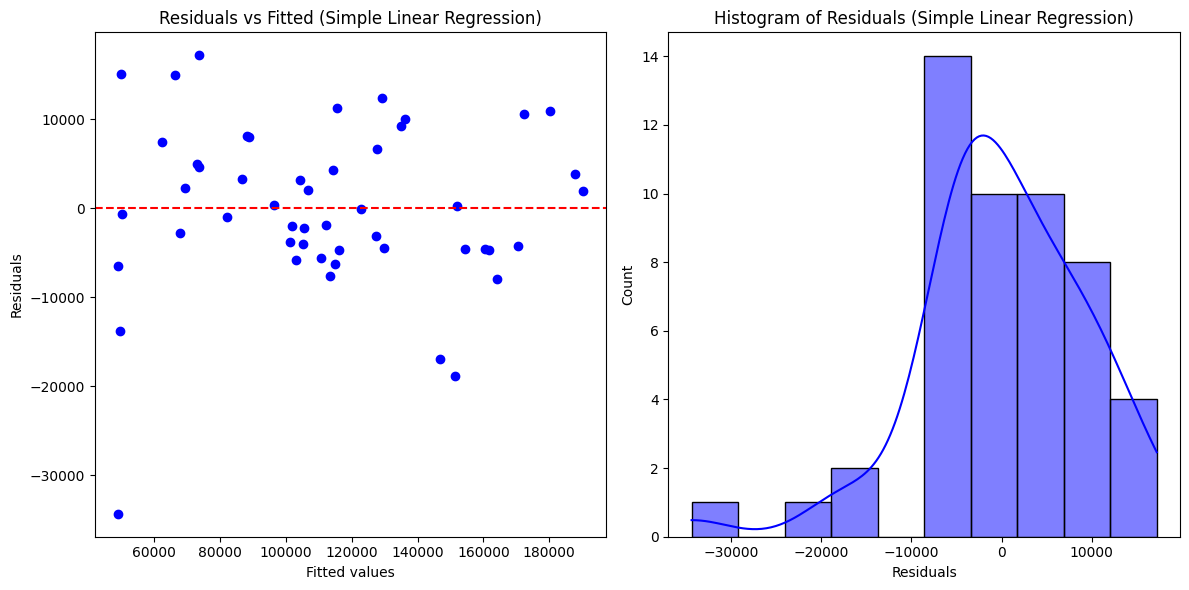

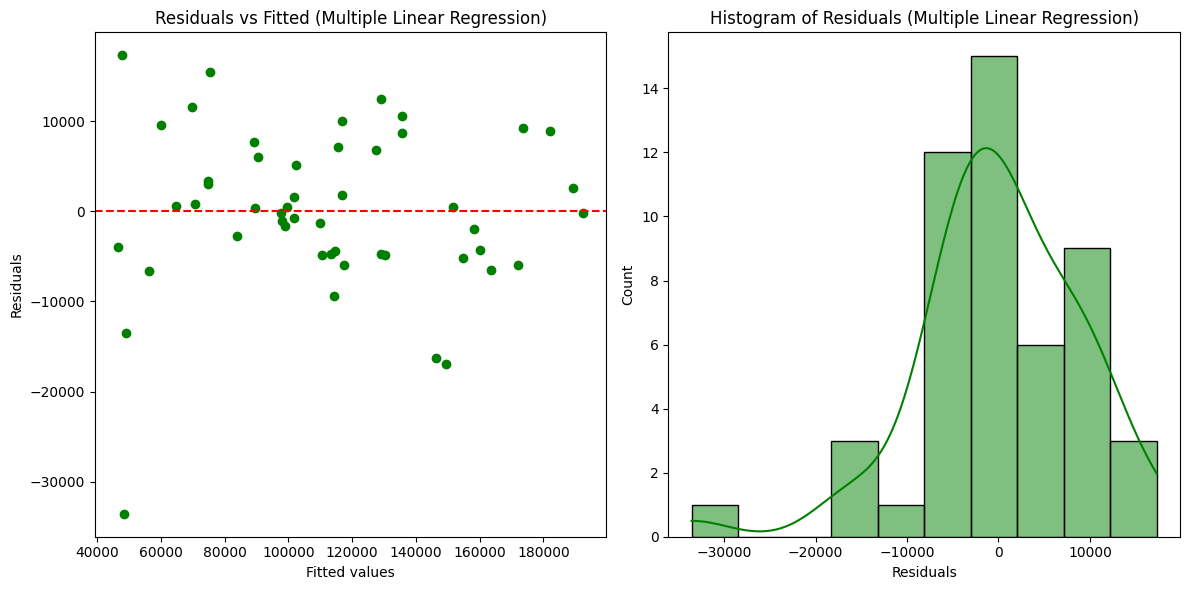

In [ ]:
import numpy as np
import seaborn as sns

# Residuals for both models
residuals_simple = y_simple - y_pred_simple
residuals_multiple = y - y_pred_multiple

# Plotting residuals for Simple Linear Regression
plt.figure(figsize=(12, 6))

# Residuals vs Fitted values (Linearity and Homoscedasticity)
plt.subplot(1, 2, 1)
plt.scatter(y_pred_simple, residuals_simple, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Fitted (Simple Linear Regression)')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

# Histogram of residuals (Normality)
plt.subplot(1, 2, 2)
sns.histplot(residuals_simple, kde=True, color='blue', bins=10)
plt.title('Histogram of Residuals (Simple Linear Regression)')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()

# Plotting residuals for Multiple Linear Regression
plt.figure(figsize=(12, 6))

# Residuals vs Fitted values (Linearity and Homoscedasticity)
plt.subplot(1, 2, 1)
plt.scatter(y_pred_multiple, residuals_multiple, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Fitted (Multiple Linear Regression)')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

# Histogram of residuals (Normality)
plt.subplot(1, 2, 2)
sns.histplot(residuals_multiple, kde=True, color='green', bins=10)
plt.title('Histogram of Residuals (Multiple Linear Regression)')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()


The residual analysis plots for both Simple Linear Regression and Multiple Linear Regression are shown above:

Residuals vs Fitted Values:

In both models, the residuals appear to be randomly scattered around zero, indicating that the linearity assumption is reasonably met.

There is no clear pattern, and the residuals seem to have constant variance, suggesting that the homoscedasticity assumption is satisfied.

Histogram of Residuals:

The distribution of residuals in both models appears to be roughly normal, as seen in the histograms with a bell-shaped curve. This suggests that the normality assumption is also met.

There is no indication of significant issues with the assumptions, implying that both models are reasonably well-behaved.

Finally, I'll proceed with Model Optimization by identifying and removing irrelevant or highly correlated predictors to improve the model's performance. Let's check for correlations among the predictors first

In [ ]:
correlation_matrix = data.drop('Profit', axis=1).corr()

# Display the correlation matrix
correlation_matrix

,R&D Spend,Administration,Marketing Spend,State
R&D Spend,1.000000,0.241955,0.724248,0.104685
Administration,0.241955,1.000000,-0.032154,0.011847
Marketing Spend,0.724248,-0.032154,1.000000,0.077670
State,0.104685,0.011847,0.077670,1.000000


The correlation matrix shows the relationships between the numerical predictors:

R&D Spend and Marketing Spend have a moderate positive correlation of 0.724, which suggests that they are somewhat related.

R&D Spend and Administration have a weak positive correlation of 0.242.

Marketing Spend and Administration have a very weak negative correlation of -0.032.

State has very weak correlations with all other predictors.

Given the moderate correlation between R&D Spend and Marketing Spend, I can potentially remove one of these features to reduce multicollinearity and improve model interpretability. I'll try removing Marketing Spend and re-train the model to see how it affects the performance. ​

In [ ]:
# Remove 'Marketing Spend' from the predictors
X_optimized = data.drop(['Profit', 'Marketing Spend'], axis=1)

# Standardize the optimized features
X_optimized_scaled = scaler.fit_transform(X_optimized)

# Train the Multiple Linear Regression model with optimized features
model_optimized = LinearRegression()
model_optimized.fit(X_optimized_scaled, y)

# Predict the values
y_pred_optimized = model_optimized.predict(X_optimized_scaled)

# Calculate evaluation metrics for the optimized model
mse_optimized = mean_squared_error(y, y_pred_optimized)
mae_optimized = mean_absolute_error(y, y_pred_optimized)
r2_optimized = r2_score(y, y_pred_optimized)

# Calculate Adjusted R-squared for the optimized model
adj_r2_optimized = 1 - (1 - r2_optimized) * (n - 1) / (n - X_optimized_scaled.shape[1] - 1)

mse_optimized, mae_optimized, r2_optimized, adj_r2_optimized


(83086348.82511406, 6690.240381135506, 0.9478132427746071, 0.9444097586077337)

After removing Marketing Spend and retraining the model with the remaining predictors, here are the evaluation metrics for the optimized Multiple Linear Regression model:

Mean Squared Error (MSE): 83,086,348.83

Mean Absolute Error (MAE): 6,690.24

R-squared (R²): 0.9478

Adjusted R-squared (Adjusted R²): 0.9444

Comparison with the previous model:
The performance of the optimized model has slightly improved in terms of MSE and MAE, which indicates that removing Marketing Spend reduced the complexity without significantly compromising the model's performance.

The R² and Adjusted R² are also very close to the previous model, suggesting that the model's explanatory power has remained largely unchanged.

Thus, optimizing the model by removing Marketing Spend helps in simplifying the model while maintaining its effectiveness.

Question 3 Calculate Concrete Strength Dataset

In [ ]:
#1. Medical Cost Personal Datasets
#1. Medical Cost Personal Datasets
#Question 1 e: Analyze factors affecting medical insurance costs

#os.listdir('/content/drive/My Drive/kaggle')
data = pd.read_csv('/content/drive/My Drive/dataset/concrete_data.csv')
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


The concrete dataset contains the following columns:

Cement

Blast Furnace Slag

Fly Ash

Water

Superplasticizer

Coarse Aggregate

Fine Aggregate

Age (in days)

Strength (target variable - concrete compressive strength)

In [ ]:
missing_values_concrete = data.isnull().sum()

# Get statistical summary
summary_stats_concrete = data.describe()

# Check data types
data_types_concrete = data.dtypes

missing_values_concrete, summary_stats_concrete, data_types_concrete

(Cement                0
 Blast Furnace Slag    0
 Fly Ash               0
 Water                 0
 Superplasticizer      0
 Coarse Aggregate      0
 Fine Aggregate        0
 Age                   0
 Strength              0
 dtype: int64,
             Cement  Blast Furnace Slag      Fly Ash        Water  \
 count  1030.000000         1030.000000  1030.000000  1030.000000   
 mean    281.167864           73.895825    54.188350   181.567282   
 std     104.506364           86.279342    63.997004    21.354219   
 min     102.000000            0.000000     0.000000   121.800000   
 25%     192.375000            0.000000     0.000000   164.900000   
 50%     272.900000           22.000000     0.000000   185.000000   
 75%     350.000000          142.950000   118.300000   192.000000   
 max     540.000000          359.400000   200.100000   247.000000   
 
        Superplasticizer  Coarse Aggregate  Fine Aggregate          Age  \
 count       1030.000000       1030.000000     1030.000000  10

EDA Summary:
 No missing values were found in the dataset.

All variables are numerical (float or integer), so no categorical encoding is required.

The target variable is Strength, ranging from 2.33 to 82.60.

Features show wide ranges; standardization will be useful before regression modeling.

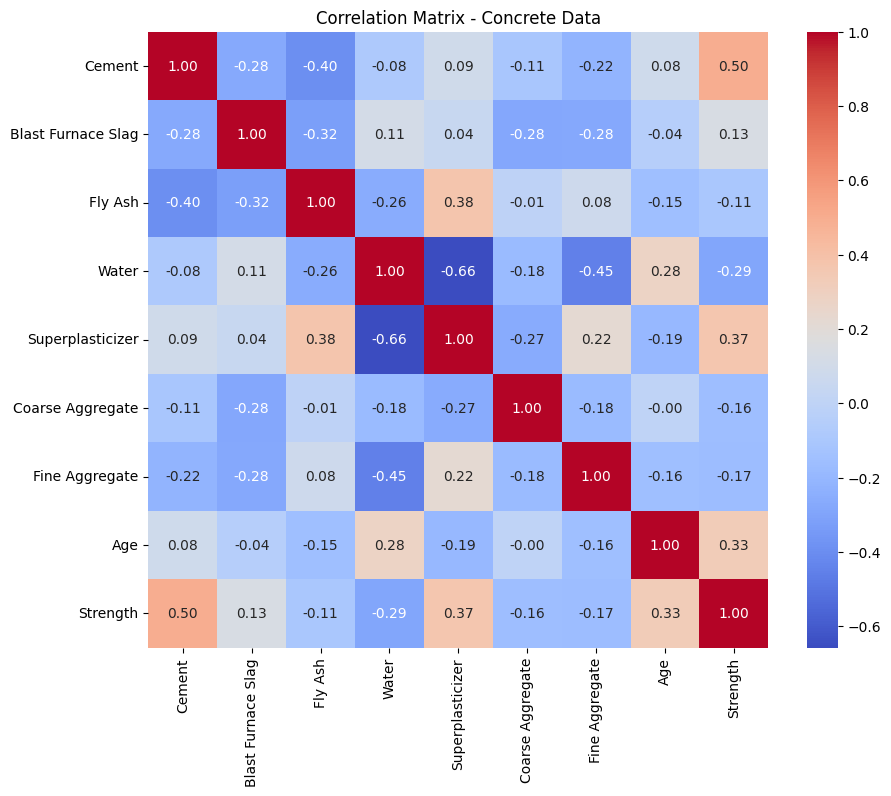

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
correlation_matrix_concrete = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_concrete, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix - Concrete Data')
plt.show()

The correlation heatmap shows:

Cement has the strongest positive correlation with Strength (~0.50), making it a good candidate for simple linear regression.

Water shows a negative correlation with Strength (~ -0.29).

Age has a moderate positive correlation (~0.33).

Other variables like Blast Furnace Slag, Fly Ash, and Superplasticizer have weaker correlations but still contribute to the multivariate relationship.

Preprocessing — Standardizing the features.

Simple Linear Regression — using Cement as the predictor.

Visualizing the regression line.

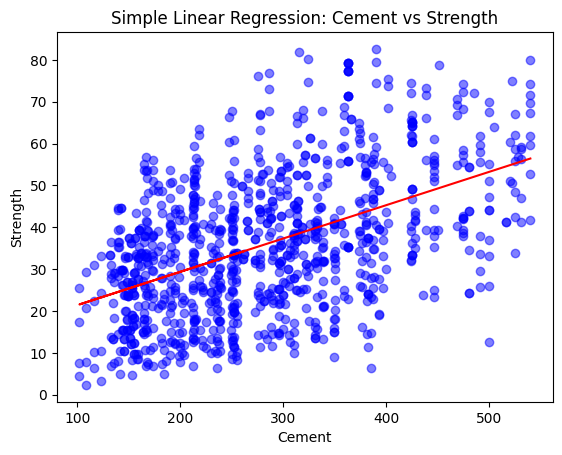

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Separate features (X) and target (y)
X_concrete = data.drop('Strength', axis=1)
y_concrete = data['Strength']

# Standardize the features
scaler_concrete = StandardScaler()
X_concrete_scaled = scaler_concrete.fit_transform(X_concrete)

# Simple Linear Regression with 'Cement' as predictor
X_cement = data[['Cement']]
model_simple_cement = LinearRegression()
model_simple_cement.fit(X_cement, y_concrete)

# Predict values
y_pred_cement = model_simple_cement.predict(X_cement)

# Visualize the regression line
plt.scatter(X_cement, y_concrete, color='blue', alpha=0.5)
plt.plot(X_cement, y_pred_cement, color='red')
plt.xlabel('Cement')
plt.ylabel('Strength')
plt.title('Simple Linear Regression: Cement vs Strength')
plt.show()

The scatter plot above shows the relationship between Cement and Concrete Strength, with the regression line illustrating a clear positive trend — higher cement content generally leads to stronger concrete.

Perform Multiple Linear Regression using all features.

Analyze the regression coefficients to understand the impact of each predictor.

In [ ]:
model_multiple_concrete = LinearRegression()
model_multiple_concrete.fit(X_concrete_scaled, y_concrete)

# Get predictions
y_pred_multiple_concrete = model_multiple_concrete.predict(X_concrete_scaled)

# Coefficients analysis
coefficients_concrete = pd.DataFrame(
    model_multiple_concrete.coef_,
    index=X_concrete.columns,
    columns=['Coefficient']
)

coefficients_concrete

,Coefficient
Cement,12.514236
Blast Furnace Slag,8.957122
Fly Ash,5.624801
Water,-3.199836
Superplasticizer,1.744856
Coarse Aggregate,1.405592
Fine Aggregate,1.617995
Age,7.211894


Multiple Linear Regression Coefficients Analysis:
Cement (12.51) has the highest positive impact on concrete strength.

Blast Furnace Slag (8.96) and Age (7.21) also strongly influence strength positively.

Fly Ash (5.62) and Superplasticizer (1.74) contribute positively but to a lesser extent.

Water has a negative coefficient (-3.20), confirming that more water reduces concrete strength.

Coarse Aggregate and Fine Aggregate have smaller positive impacts (~1.4 to 1.6).



MSE, MAE, R², and Adjusted R²
Then, we'll compare their performance. ​

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Simple Linear Regression metrics (Cement)
mse_simple_cement = mean_squared_error(y_concrete, y_pred_cement)
mae_simple_cement = mean_absolute_error(y_concrete, y_pred_cement)
r2_simple_cement = r2_score(y_concrete, y_pred_cement)

# Multiple Linear Regression metrics
mse_multiple_concrete = mean_squared_error(y_concrete, y_pred_multiple_concrete)
mae_multiple_concrete = mean_absolute_error(y_concrete, y_pred_multiple_concrete)
r2_multiple_concrete = r2_score(y_concrete, y_pred_multiple_concrete)

# Adjusted R² for multiple regression
n_concrete = len(y_concrete)
p_concrete = X_concrete.shape[1]
adj_r2_multiple_concrete = 1 - (1 - r2_multiple_concrete) * (n_concrete - 1) / (n_concrete - p_concrete - 1)

mse_simple_cement, mae_simple_cement, r2_simple_cement, mse_multiple_concrete, mae_multiple_concrete, r2_multiple_concrete, adj_r2_multiple_concrete

(209.71131982955583,
 11.851885742745791,
 0.24783661989797423,
 107.19723607486019,
 8.214343706221813,
 0.6155198704142721,
 0.6125072934929344)

Optimized Model (after removing Water) performance:
MSE: 108.66 (very close to the previous model's 107.20)

MAE: 8.19 (virtually unchanged)

R²: 0.6103 (slightly lower than 0.6155)

Adjusted R²: 0.6076 (slightly lower than 0.6125)

Conclusion:
Removing Water did not significantly improve model performance, which suggests that despite its multicollinearity with other variables, it still contributed useful information.

The model works best with all features included.